# Notebook Imports and Packages


In [48]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #colormap

import sympy # symbolic math
from sympy import symbols, diff
import random
import math

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline  
# führt dazu, dass die plots gut exportiert werden können und direkt sichtbar sind


## Example 1 - A simple cost function

$f(x) = x^2 + x +1$


In [49]:
def f(x):
    return x**2 + x +1

In [50]:
#Make Data
x_1 = np.linspace(start=-3, stop =3, num =500)
# erstellt eine von 100 zahlen zwischen -3 und 3



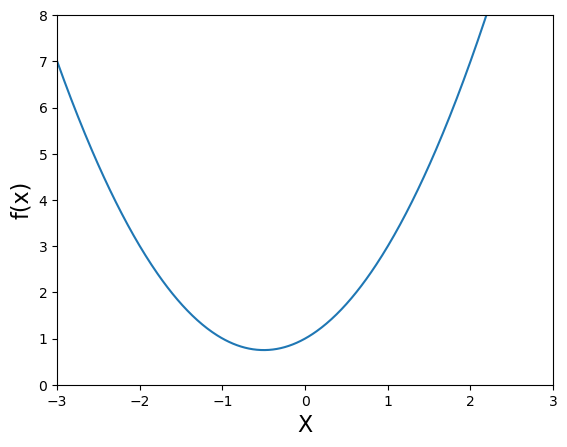

In [51]:
#Plot our data

plt.xlim([-3,3])
plt.ylim(0,8)

plt.xlabel("X", fontsize = 16)
plt.ylabel("f(x)", fontsize = 16)


plt.plot(x_1, f(x_1))


plt.show()

## Slope & Derivatives - Neigung und Ableitungen
Um die die Kosten Funktion zu erfüllen müssen wir den punkt der minimalen Steigung in der Kurve finden -> Ableiten


In [52]:
def df(x):
    return 2*x +1

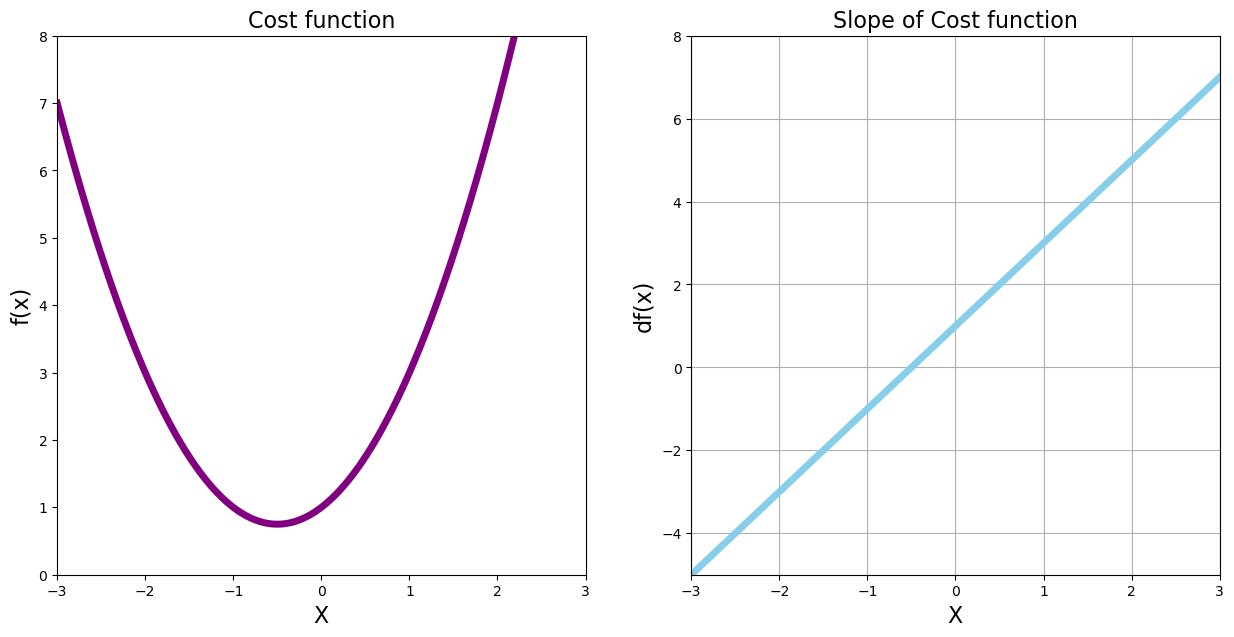

In [53]:
# side by side view 2 plots -> subplots

plt.figure(figsize =[15,7])

plt.subplot(1,2,1)
# subplot(row, column, index)
plt.xlim([-3,3])
plt.ylim(0,8)

plt.title("Cost function", fontsize = 16)
plt.xlabel("X", fontsize = 16)
plt.ylabel("f(x)", fontsize = 16)

plt.plot(x_1, f(x_1), color = "purple", linewidth=5)

#second plot:

plt.subplot(1,2,2)
plt.title("Slope of Cost function", fontsize = 16)
plt.xlim([-3,3])

plt.grid()
plt.ylim(-5,8)
plt.xlabel("X", fontsize = 16)
plt.ylabel("df(x)", fontsize = 16)

plt.plot(x_1, df(x_1), color = "skyblue", linewidth=5)



plt.show()

# gradient descent algorithm -> finds the less steepest part -> lowest cost
## a.k.a steepest descent




In [54]:
new_x = 3
prev_x =0
step_multiplier = 0.1

for n in range(100):
    prev_x = new_x
    gradient = df(prev_x)
    new_x = prev_x -step_multiplier * gradient

    # dadurch bewegen wir uns in Richtung des Minimus 
    # wir bekommen nach den Durchlaufen dann einen Wert X heraus an dem das Minimum liegt
    # -step_multiplier * gradient hier liegt das Lernen, also das Anpassen des
    # Algorithmus -> predict > Calculate error > learn/adapt
    
print(f"Local minimum is at: {new_x}")
print(f"Steigung oder df(x) an der Stelle ist {df(new_x)}")
print(f"f(x) and dem Punkt ist {f(new_x)}")

    

Local minimum is at: -0.4999999992870374
Steigung oder df(x) an der Stelle ist 1.4259251557291464e-09
f(x) and dem Punkt ist 0.75


## Adding Precision to run until we hit the desired outcome precision


In [55]:


new_x = 3
prev_x =0
step_multiplier = 0.1
precision = 0.0000001  # gewünschte Präzision
# präzision ist der Unterschie zwischen dem alten und neuem x wert
# wenn wir ganz nah sind wird der Unterschied immer geringer


for n in range(100):
    prev_x = new_x
    gradient = df(prev_x)
    new_x = prev_x -step_multiplier * gradient

    # dadurch bewegen wir uns in Richtung des Minimus 
    # wir bekommen nach den Durchlaufen dann einen Wert X heraus an dem das Minimum liegt
    # -step_multiplier * gradient hier liegt das Lernen, also das Anpassen des
    # Algorithmus -> predict > Calculate error > learn/adapt
    
    step_size = abs(new_x - prev_x)
    #print(step_size)
    if step_size <= precision:
        print("präzise ! ")
        print(n)
        break
    
print(f"Local minimum is at: {new_x}")
print(f"Steigung oder df(x) an der Stelle ist {df(new_x)}")
print(f"f(x) and dem Punkt ist {f(new_x)}")

    

präzise ! 
71
Local minimum is at: -0.4999996314069791
Steigung oder df(x) an der Stelle ist 7.371860417659803e-07
f(x) and dem Punkt ist 0.7500000000001359


## Let's make it visual!

präzise ! 
71


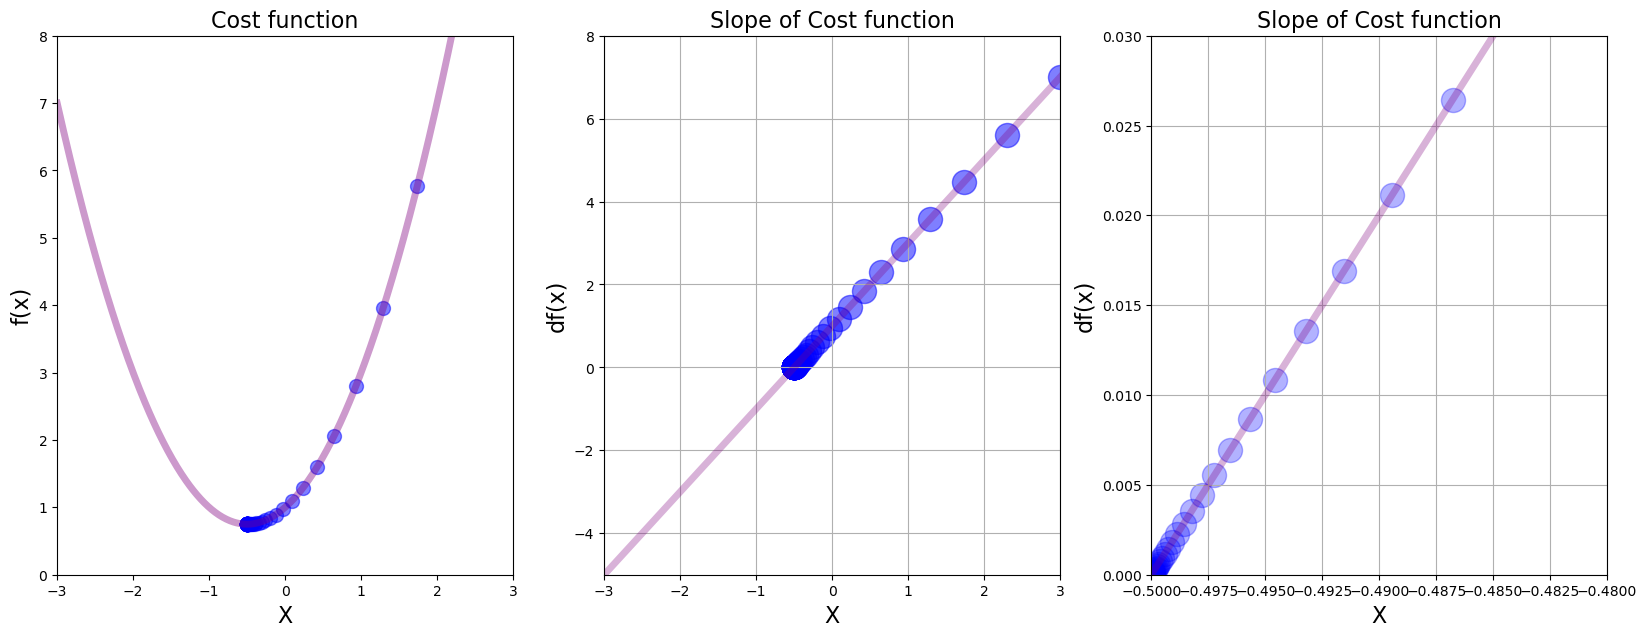

In [56]:


new_x = 3
prev_x =0
step_multiplier = 0.1
precision = 0.0000001  # gewünschte Präzision
# präzision ist der Unterschie zwischen dem alten und neuem x wert
# wenn wir ganz nah sind wird der Unterschied immer geringer
x_list = [new_x]
slope_list = [df(new_x)]

for n in range(100):
    prev_x = new_x
    gradient = df(prev_x)
    new_x = prev_x -step_multiplier * gradient

    # dadurch bewegen wir uns in Richtung des Minimus 
    # wir bekommen nach den Durchlaufen dann einen Wert X heraus an dem das Minimum liegt
    # -step_multiplier * gradient hier liegt das Lernen, also das Anpassen des
    # Algorithmus -> predict > Calculate error > learn/adapt
    
    step_size = abs(new_x - prev_x)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    #print(step_size)
    if step_size <= precision:
        print("präzise ! ")
        print(n)
        break

        
# Überlager die Gradien descent Berechnungen

plt.figure(figsize =[20,7])

plt.subplot(1,3,1)
# subplot(row, column, index)
plt.xlim([-3,3])
plt.ylim(0,8)

plt.title("Cost function", fontsize = 16)
plt.xlabel("X", fontsize = 16)
plt.ylabel("f(x)", fontsize = 16)

plt.plot(x_1, f(x_1), color = "purple", linewidth=5, alpha=0.4)


#scatterplot der gradent descents
values = np.array(x_list)
plt.scatter(x_list, f(values), color = "blue", s =100, alpha = 0.5)

#second plot:

plt.subplot(1,3,2)
plt.title("Slope of Cost function", fontsize = 16)
plt.xlim([-3,3])

plt.grid()
plt.ylim(-5,8)
plt.xlabel("X", fontsize = 16)
plt.ylabel("df(x)", fontsize = 16)

plt.scatter(x_list, slope_list, color = "blue", s =300, alpha = 0.5)

plt.plot(x_1, df(x_1), color = "purple", linewidth=5, alpha = 0.3)


#third plot close-up:



plt.subplot(1,3,3)
plt.title("Slope of Cost function", fontsize = 16)
plt.xlim(-0.5,-0.48)

plt.grid()
plt.ylim(0,0.03)
plt.xlabel("X", fontsize = 16)
plt.ylabel("df(x)", fontsize = 16)

plt.scatter(x_list, slope_list, color = "blue", s =300, alpha = 0.3)

plt.plot(x_1, df(x_1), color = "purple", linewidth=5, alpha = 0.3)


plt.show()






# Example 2 - multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 +5 $$


In [57]:
# Make data
x_2 = np.linspace(-2,2,100)

# g(x) und dg(x)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 -8*x



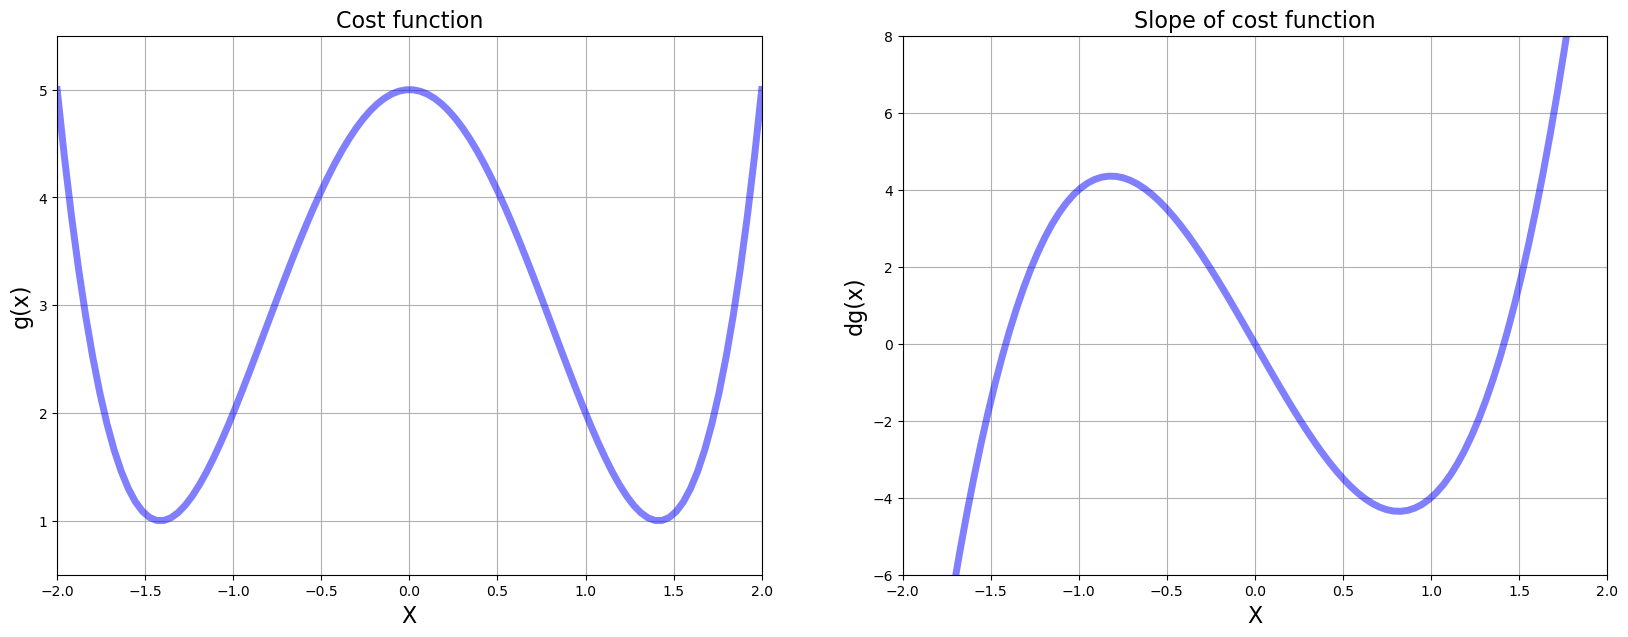

In [58]:
# make cost function 

plt.figure(figsize =[20,7])

#1st plot loss function
plt.subplot(1,2,1)
plt.title("Cost function", fontsize = 16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.xlabel("X", fontsize = 16)
plt.ylabel("g(x)", fontsize = 16)


plt.plot(x_2, g(x_2), color = "blue", linewidth=5, alpha = 0.5)



# 2n plot, slope
plt.subplot(1,2,2)
plt.title("Slope of cost function", fontsize = 16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel("X", fontsize = 16)
plt.ylabel("dg(x)", fontsize = 16)

plt.plot(x_2, dg(x_2),  color = "blue", linewidth=5, alpha = 0.5)



plt.show()

### function with a function as arguments, default values, pass multiple arguments

## Gradient Descent as a Python Function

In [59]:
# 4 Werte: Ableitung, initial_guess, learning_rate (multiplier), precision
# In Python ist eine Funktion ein Objekt, dass übergeben werden kann

def gradient_descent2(derivative_fun, initial_guess, learning_rate, precision):
    
    new_x = initial_guess
    
    x_list = [new_x]
    slope_list = [derivative_fun(new_x)]
 
    
    for n in range(100):
        prev_x = new_x
        gradient = derivative_fun(prev_x)
        new_x = prev_x -learning_rate * gradient
        
        step_size = abs(new_x - prev_x)
        
        x_list.append(new_x)
        slope_list.append(derivative_fun(new_x))

        if step_size <= precision:
            break
        
    return new_x, x_list, slope_list

        

#gradient_descent(dg,0.5,0.0,0.0001)
    
    
  

In [60]:
local_min, list_x, deriv_list = gradient_descent2(dg, -0.5,0.02, 0.0001)
                                                
print(f"Local min occurs at: {local_min}")
print(f"Number of steps taken: {len(list_x)}")
#pint(f"")

Local min occurs at: -1.4140176512739588
Number of steps taken: 29


In [61]:
local_min, list_x, deriv_list = gradient_descent2(derivative_fun = dg, initial_guess = 0.5,
                                                 learning_rate = 0.02, precision = 0.0001)
print(f"Local min occurs at: {local_min}")
print(f"Number of steps taken: {len(list_x)}")
#pint(f"")

Local min occurs at: 1.4140176512739588
Number of steps taken: 29


## Giving default values:


In [62]:

        

def gradient_descent(derivative_fun, initial_guess, learning_rate=0.02, precision=0.001, 
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_fun(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_fun(previous_x)
        new_x = previous_x - learning_rate * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_fun(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list
   


In [63]:
local_min, list_x, deriv_list = gradient_descent(derivative_fun = dg, initial_guess = 0.5)
print(f"Number of steps taken: {len(list_x)}")
print(f"Local min occurs at: {local_min}")


Number of steps taken: 23
Local min occurs at: 1.4122375085019094


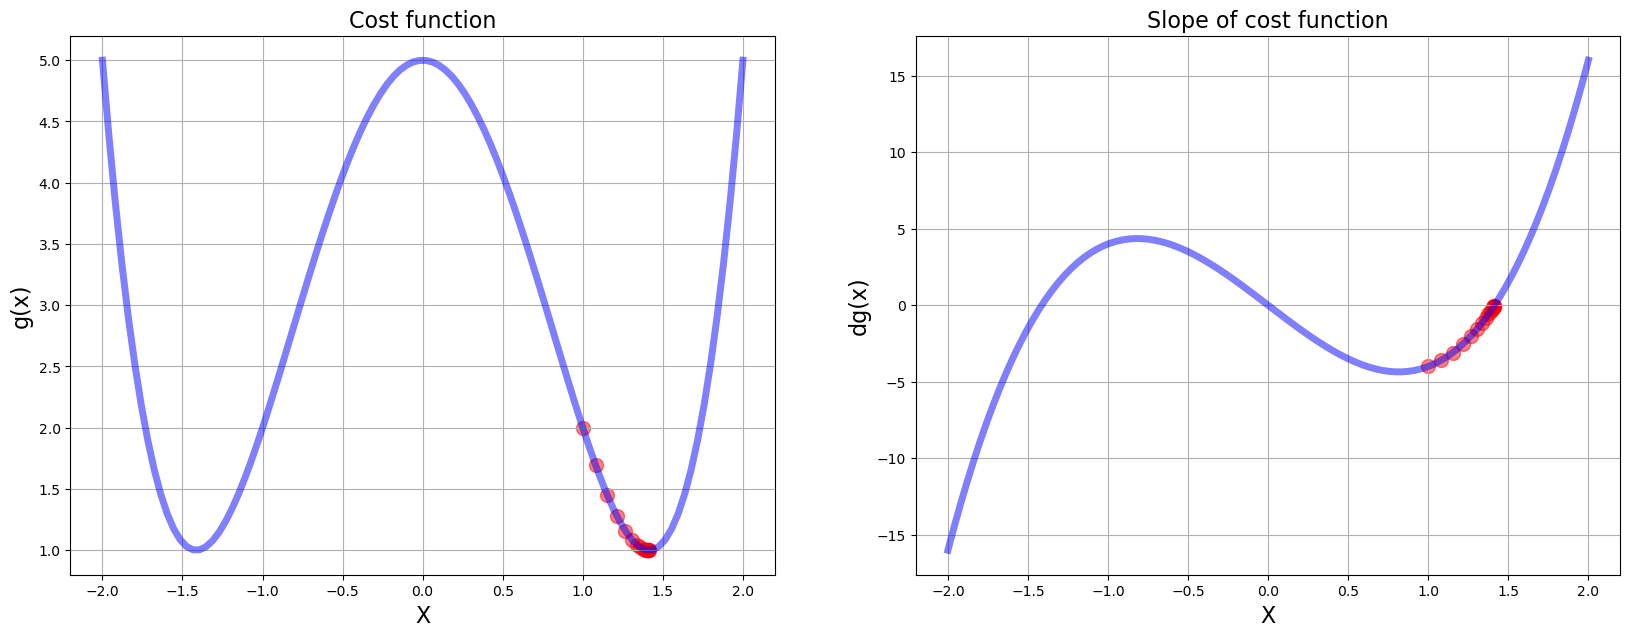

In [64]:
# make cost function 


local_min, list_x, deriv_list = gradient_descent(derivative_fun = dg, initial_guess = 1)
plt.figure(figsize =[20,7])

#1st plot loss function
plt.subplot(1,2,1)
plt.title("Cost function", fontsize = 16)
plt.grid()
#plt.xlim(0,1.5)
#plt.ylim(1,4)
plt.xlabel("X", fontsize = 16)
plt.ylabel("g(x)", fontsize = 16)

values = np.array(list_x)
plt.scatter(list_x, g(values), color = "red", s =100, alpha = 0.5)
plt.plot(x_2, g(x_2), color = "blue", linewidth=5, alpha = 0.5)



# 2n plot, slope
plt.subplot(1,2,2)
plt.title("Slope of cost function", fontsize = 16)
plt.grid()
#plt.xlim(0,1.5)
#plt.ylim(-6,0)
plt.xlabel("X", fontsize = 16)
plt.ylabel("dg(x)", fontsize = 16)

plt.scatter(list_x,deriv_list , color = "red", s =100,  alpha = 0.5)
plt.plot(x_2, dg(x_2),  color = "blue", linewidth=5, alpha = 0.5)




plt.show()

### Mit dieser Funktion finden wir eine Nullstelle in der Ableitung und damit 1 Extrempunkt -> Unser Startpunkt bestimmt das Resultat


### Es gibt verschiede gradient descent versionen. Unsere heißt gradient descent batch

### eine andere gradient descent stochastic, diese baut variation durch Zufall ein

### alle haben pros und cons


# Example 3 - Divergence, Overflow, Python Tuples
## $$h(x) = x^5 -2x^4 +2$$

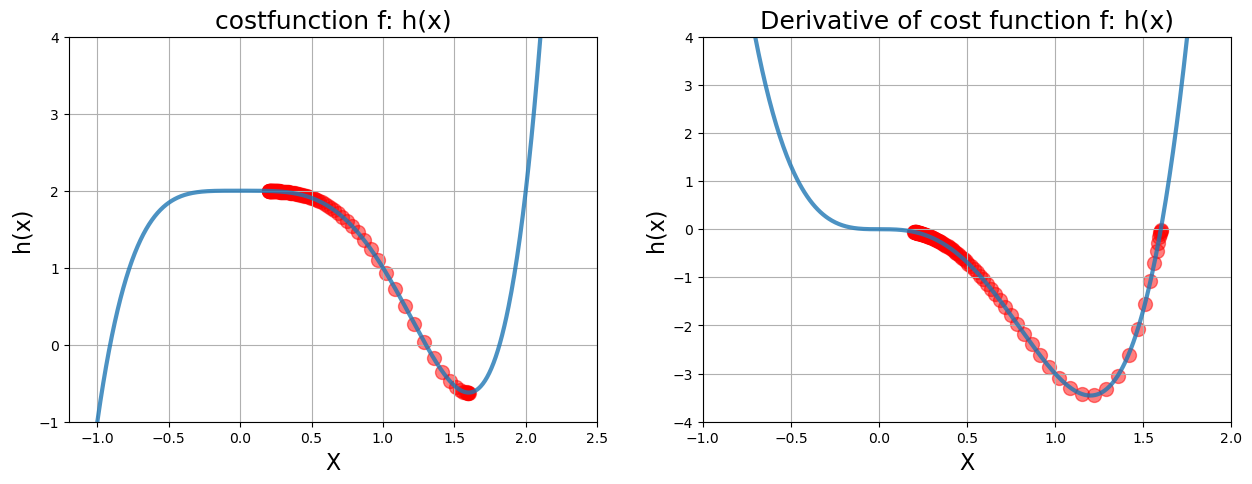

Local min occurs at: 1.5989534547394717
Cost of minim is -0.6214287992331258
Number of Steps 73


In [65]:
x_3 = np.linspace(start = -2.5, stop = 2.5, num = 1000)
# x_3 erhält 1000 Zahwln zwischen -2.5 und 2.5

def h(x):
    return x**5 - 2*x**4 +2

def dh(x):
    return 5*x**4 - 8*x**3


local_min, list_x, deriv_list = gradient_descent(derivative_fun = dh, initial_guess = 0.2)
#plot function and derivation side by side

plt.figure(figsize =[15,5])



#Chart 1: cost function
plt.subplot(1,2,1)

plt.grid()
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)

plt.title("costfunction f: h(x)",fontsize = 18)
plt.xlabel("X", fontsize = 16)
plt.ylabel("h(x)", fontsize = 16)


plt.plot(x_3,h(x_3), linewidth=3, alpha= 0.8)
plt.scatter(list_x, h(np.array(list_x)), color ="red", s=100, alpha =0.5)


#Chart 2: Derivative
plt.subplot(1,2,2)

plt.grid()
plt.xlim(-1,2)
plt.ylim(-4,4)

plt.title("Derivative of cost function f: h(x)",fontsize = 18)
plt.xlabel("X", fontsize = 16)
plt.ylabel("h(x)", fontsize = 16)

plt.plot(x_3,dh(x_3), linewidth=3, alpha = 0.8)
plt.scatter(list_x, deriv_list, color = "red", s=100, alpha =0.5)

plt.show()

print(f"Local min occurs at: {local_min}")
print(f"Cost of minim is {h(local_min)}")
print(f"Number of Steps {len(x_list)}")


## Python Tuples 
### sequence unpacking
#### anders als listen, kann der Inhalt verschiedener Typen sein
#### tuples sind immutable, wir können sie später nicht verändern oder hinzufügen

In [66]:
# creating a tuple by: tuple packing 
breakfast = "coffee", "eggs", "bread" 

print(breakfast[0])


#wir können die WErte eines Tuples in eine line zuweisen -> sequence unpacking

drink, protein, side = breakfast
print(drink)
print(protein)
print(side)


coffee
coffee
eggs
bread


## Learning rate


number of steps 13


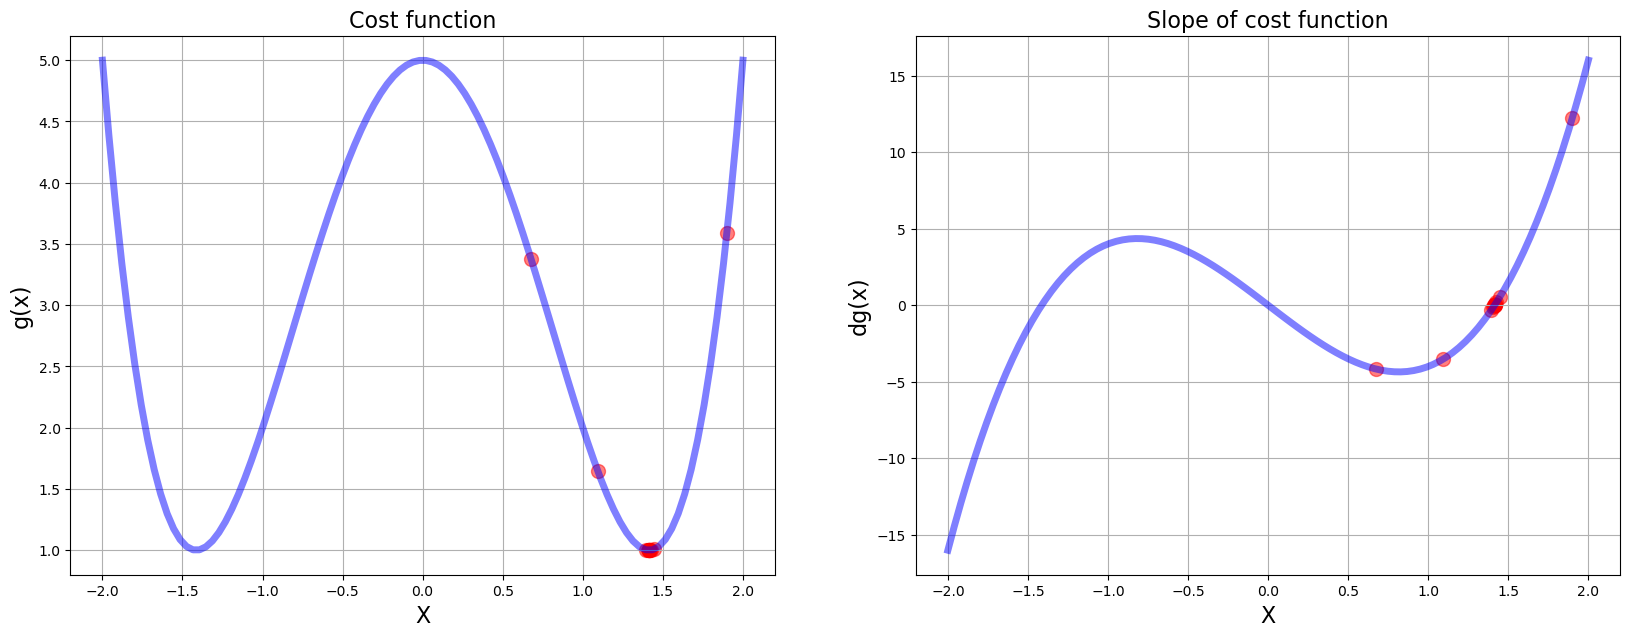

In [67]:
# make cost function 


local_min, list_x, deriv_list = gradient_descent(derivative_fun = dg, initial_guess = 1.9, learning_rate=0.1)
plt.figure(figsize =[20,7])

#1st plot loss function
plt.subplot(1,2,1)
plt.title("Cost function", fontsize = 16)
plt.grid()
#plt.xlim(0,1.5)
#plt.ylim(1,4)
plt.xlabel("X", fontsize = 16)
plt.ylabel("g(x)", fontsize = 16)

values = np.array(list_x)
plt.scatter(list_x, g(values), color = "red", s =100, alpha = 0.5)
plt.plot(x_2, g(x_2), color = "blue", linewidth=5, alpha = 0.5)



# 2n plot, slope
plt.subplot(1,2,2)
plt.title("Slope of cost function", fontsize = 16)
plt.grid()
#plt.xlim(0,1.5)
#plt.ylim(-6,0)
plt.xlabel("X", fontsize = 16)
plt.ylabel("dg(x)", fontsize = 16)

plt.scatter(list_x,deriv_list , color = "red", s =100,  alpha = 0.5)
plt.plot(x_2, dg(x_2),  color = "blue", linewidth=5, alpha = 0.5)


print(f"number of steps {len(list_x)}")

plt.show()

In [68]:
n = 100
#low_gamma = gradient_descent(derivative_fun = dg, initial_guess = 3, learning_rate=0.005, precision = 0.0001, max_iter = n)

low_gamma = gradient_descent(derivative_fun=dg, initial_guess= 3,
                                                learning_rate=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_fun=dg, initial_guess= 3,
                                                learning_rate=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_fun=dg, initial_guess= 3,
                                                learning_rate = 0.002, precision=0.0001, max_iter=n)


plt.figure(figsize=[20, 10])

plt.xlim(0, len(low_values))
plt.ylim(0, 50)
plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Nr of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, len(low_values)))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)


# Plotting the mid learning rate

mid_values = np.array(mid_gamma[1])

plt.plot(iteration_list, g(mid_values), color='pink', linewidth=5)
plt.scatter(iteration_list, g(mid_values), color='pink', s=80)

# Plotting the high learning rate

high_values = np.array(high_gamma[1])
plt.plot(iteration_list, g(high_values), color='blue', linewidth=5)
plt.scatter(iteration_list, g(high_values), color='blue', s=80)



plt.show()


NameError: name 'low_values' is not defined

<Figure size 2000x1000 with 0 Axes>

### JE größer die learn_rate desto schneller kommen wir zu unserem Minimum


# Example 4 - Data Visualisation with 3D Charts
## Minimise  $$f(x,y) = \frac{1}{3{-x^2 -y^2}+1}$$

## Minimes $$ f(x,y) = \frac{1}{r+1}$$
where $r$ is $3^{-x^2-y^2}$


In [69]:
def f(x,y):
    r = 3**(-x**2 -y**2)
    return 1/(r+1)

In [70]:
# Make data
x_4 = np.linspace(start =-2, stop = 2, num  =200)
y_4 = np.linspace(start =-2, stop = 2, num  =200)

# wir brauchen ein 2d array für den 3d raum
x_4, y_4 = np.meshgrid(x_4,y_4) # macht 2d array aus 1d array


#print("Shape of X array",x_4.shape)

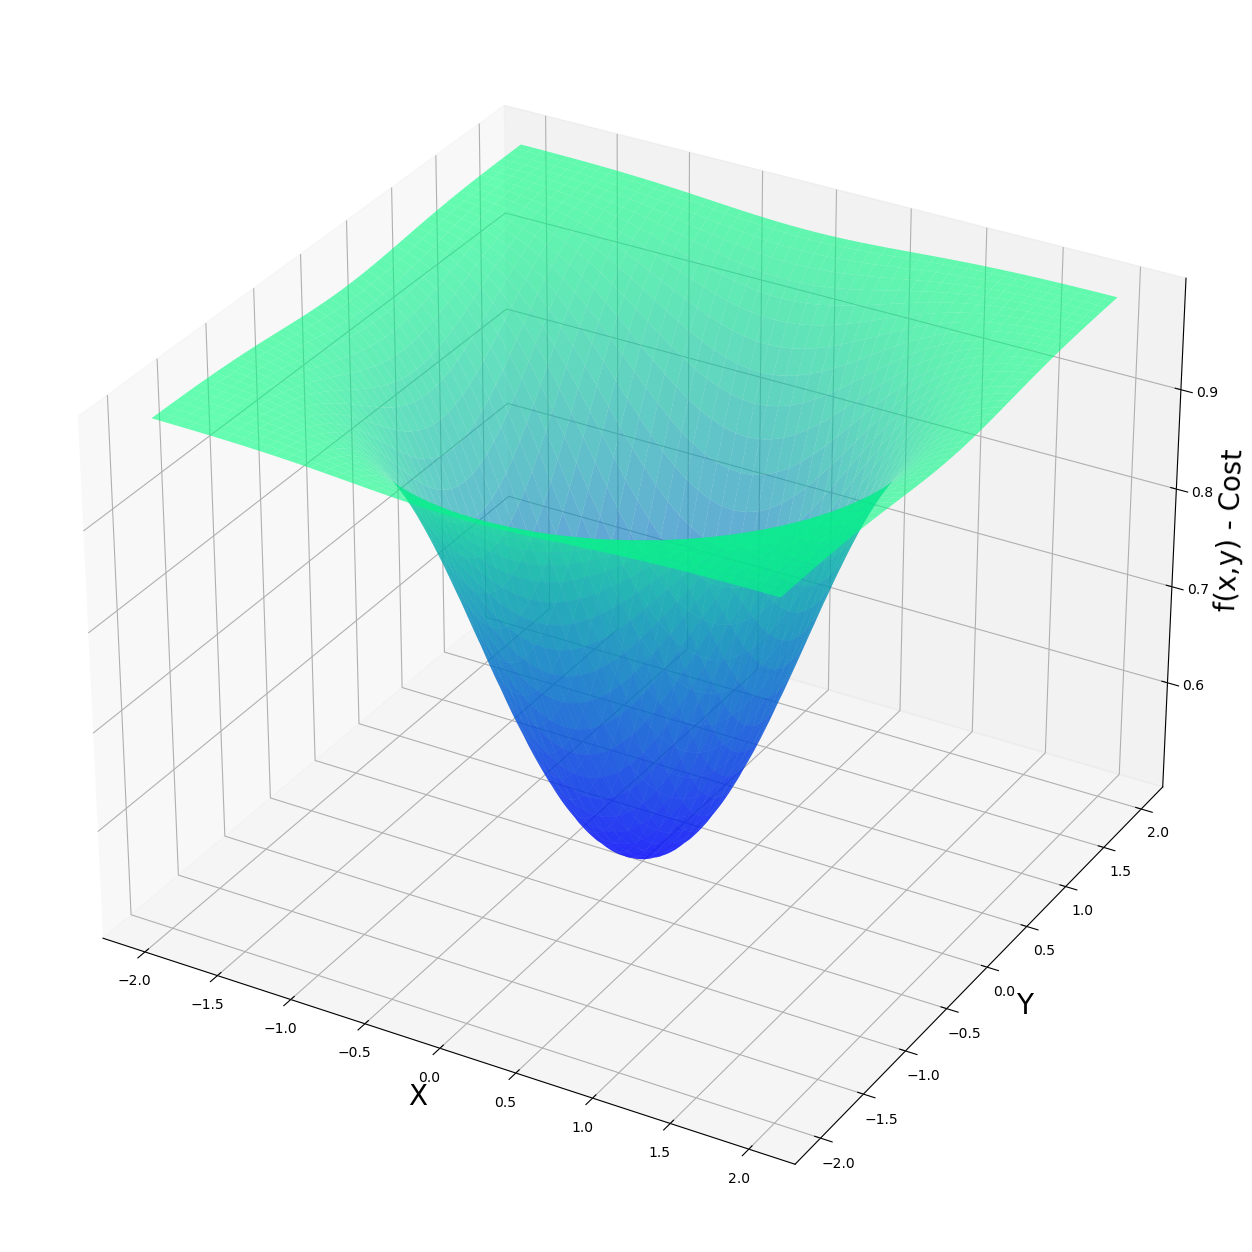

In [93]:
# für 3d Plot
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #colormap
#die figure funktion hat einen return wert -> eine Figure, den wir speichern wollen
fig = plt.figure(figsize = [16,16])
# figure ist wie ein container für anderes

ax = fig.add_subplot(projection='3d') # schafft den 3d Raum
# gca = get current axis

ax.set_xlabel("X", fontsize = 20)
ax.set_ylabel("Y", fontsize = 20)
ax.set_zlabel("f(x,y) - Cost", fontsize = 20)

ax.plot_surface(x_4,y_4, f(x_4,y_4), cmap=cm.winter, alpha = 0.6)

# je blauer desto geringer die Kosten


Cost functions sind hier viel komplexer als nur ableiten, vor allem wenn es 3d wird

müssen jetzt optimales x und y finden, nur weil eins davon niedrig ist heißt es nicht, dass es das optimale Minimum ist

Für jeden Parameter brauchen wir eine Ableitung. Dafür müssen wir teilweise Ableiten. -> x ableiten während y konstant gehalten wird und umgekehrt




## Partielle Ableitung & symbolic computation
# $$\frac{\partial f}{\partial x} = Partielle   Ableitung   von   x  $$

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot  3^{-x^2 - y^2}}{\left( 3^{-x^2 -y^2}+1\right) ^2} $$

## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot  3^{-x^2 - y^2}}{\left( 3^{-x^2 -y^2}+1\right) ^2} $$

In [72]:
import sympy # symbolic math
from sympy import symbols, diff

# sage welche symbol wir verwenden

a ,b = symbols('x,y') # a und b werden jezt als mathematische Symbol behandelt


print("our cost function f(x,y) is" ,f(a,b))

#Partielle Ableitung = differenziell. nach a fa'(a)
diff(f(a,b),a)

#diff(f(a,b),b)

our cost function f(x,y) is 1/(3**(-x**2 - y**2) + 1)


2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

How do we calculate at a particular point in our function?
-> Funktion auswerten mit einem bestimmten wert z.:B an punkt 1.8/1.0
f(a, b).evalf(subs={a:1.8,b:10}) -> gibt uns den Wert an dem bestimmten Punkt aus

In [95]:
print("dert Wert von f(x,y) an x=1.8,y=1 ist:", f(a, b).evalf(subs={a:1.8,b:10}) )


print("dert Partiellen Ableitung von f(x,y) an x=1.8,y=1 ist:",diff(f(a,b),a).evalf(subs={a:1.8,b:10})) 
# übergeben hier einem Dictionary WErte. 
# a und b wurden oben mit a ,b = symbols('x,y') als Werte festgelegt


dert Wert von f(x,y) an x=1.8,y=1 ist: 1.00000000000000
dert Partiellen Ableitung von f(x,y) an x=1.8,y=1 ist: 2.18347697237992e-49


In [74]:
# Partielle Ableitungs Funktion example 4:


#def fpx(x,y):
#    return (2*x * np.log(3) * 3**(-x**2 - y**2))/((3**(-x**2 - y**2) +1)**2)

def fpx(x,y): # vereinfacht
    r = 3**(-x**2 - y**2)
    return (2*x*math.log(3)*r) / ((r+1)**2)
    
#def fpy(x,y):
 #   return (2*y * np.log(3) * 3**(-x**2 - y**2))/((3**(-x**2 - y**2) +1)**2)

def fpy(x,y): # vereinfacht aufgeteilt
    r = 3**(-x**2 - y**2)
    return (2*y*math.log(3)*r) / ((r+1)**2)

## Batch Gradient Descent with Sympy


In [96]:
# Setup

multiplier = 0.1 #learning rate
max_iter = 200
# wenn wir 2 oder mehr werte haben -> numpy array benutzten
params = np.array([1.8,1.0]) # initial guess

for n in range(max_iter):
    #Ableitung berechnen
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0], b:params[1]}) # mit .evalf berechnen wir den Funktionswert and dem Punkt in a/b
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])  # mit dem angepassen params wird auch gradients angepasst
    # damit jetzt die Paramenter anpassen
    
    params = params - multiplier * gradients  # params wird jedesmal angepasst und enthält pro Durchlauf einen sich näher angenäherten Wert and as Minimum
    
#Results
print("Values in gradient array", gradients)
print("Minimum occurs at x value of: ", params[0])
print("Minimum occurs at y value of: ", params[1])
print("Cost is:", f(params[0], params[1]))


Values in gradient array [0.000461440542096373 0.000256355856720208]
Minimum occurs at x value of:  0.000793898510134722
Minimum occurs at y value of:  0.000441054727852623
Cost is: 0.500000226534985


### Jetzt mit unseren Funktionen 
### Diese Version ist schneller, da wir nicht sympy benutzen

In [97]:
# Setup

multiplier = 0.1 #learning rate
max_iter = 500
# wenn wir 2 oder mehr werte haben -> numpy array benutzten
params = np.array([1.8,1.0]) # initial guess


for n in range(max_iter):
    #Ableitung berechnen
    gradient_x = fpx(params[0], params[1])  # macht das gleiche nur nohne die evalf funktion, da wir auf sympy verzichten!
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y]) 
    # damit jetzt die Paramenter anpassen
    
    params = params - multiplier * gradients 
    
    
    # mit jedem Durchlauf wird gradient und params mit dem sich an das Minimum angenährten Wertes geupdated
    # die neuen Werte von params gehen oben wieder in die Loop ein und werden weiter angenähert.
    # Dadurch werden die Schritte immer kleiner, da wir dem Ziel näher kommen
    # mit den Durchläufen wird das Ergebnis präziser
    # die Lernrate (multiplier) bestimmt wie schnell wir am Ziel ankommen
    
#Results
print("Values in gradient array", gradients)
print("Minimum occurs at x value of: ", params[0])
print("Minimum occurs at y value of: ", params[1])
print("Cost is:", f(params[0], params[1]))


Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
Cost is: 0.5


## Techniques for numpy for multidimensional arrays

In [77]:
# Advanced Numpy Array Practice

kirk = np.array([["Captain", "Guitar"]])
print(kirk.shape)

hs_band = np.array([["Black Thought", "MC"],["Schulz","Drums"]])
#print(hs_band.shape) 
#print("hs_band[0][1]",hs_band[0][1])
# wählen erst die Zeile aus, dann die Spalte
# können auch eine ganze Reihe ausgeben
#print("hs_band[1]",hs_band[1])

#np.appen(ArrayZumHinzufügen, Was, wo) # axis = als zeile oder spalte hinzufügen
# axis = 0 heißt neue row, axis = 1 heißt neue column
# die Dimensionen müssen aber übereinstimmen
the_root = np.append(arr= hs_band, values=kirk, axis = 0)
#print(the_root)

# selecet all the row erste spalte [:,0]

the_root = np.append(arr = the_root, values = [["Matz", "Singer"]], axis = 0)

print(the_root[:,1])
print(the_root[:,0])
print(the_root[0,:])
print(the_root[1,:])
print(the_root[2,:])
print(the_root[3,:])

(1, 2)
['MC' 'Drums' 'Guitar' 'Singer']
['Black Thought' 'Schulz' 'Captain' 'Matz']
['Black Thought' 'MC']
['Schulz' 'Drums']
['Captain' 'Guitar']
['Matz' 'Singer']


## plotting gradient descent on a 3d surface
## N-Dimensional Arrays of Numpy

In [78]:
# Setup

multiplier = 0.1 #learning rate
max_iter = 500
# wenn wir 2 oder mehr werte haben -> numpy array benutzten
params = np.array([1.8,1.0]) # initial guess


#values_array = params  # brauchen 2d array, bisher ist es nur eine
#print(values_array.shape)

values_array = params.reshape(1,2) #1 row 2 colums
print(values_array.shape) # jetzt ist es 2d


for n in range(max_iter):
    #Ableitung berechnen
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y]) 
    # damit jetzt die Paramenter anpassen
    
    params = params - multiplier * gradients 
    values_array = np.append(arr = values_array, 
                             values = params.reshape(1,2), axis = 0)
    
#Results
print("Values in gradient array", gradients)
print("Minimum occurs at x value of: ", params[0])
print("Minimum occurs at y value of: ", params[1])
print("Cost is:", f(params[0], params[1]))

(1, 2)
Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
Cost is: 0.5


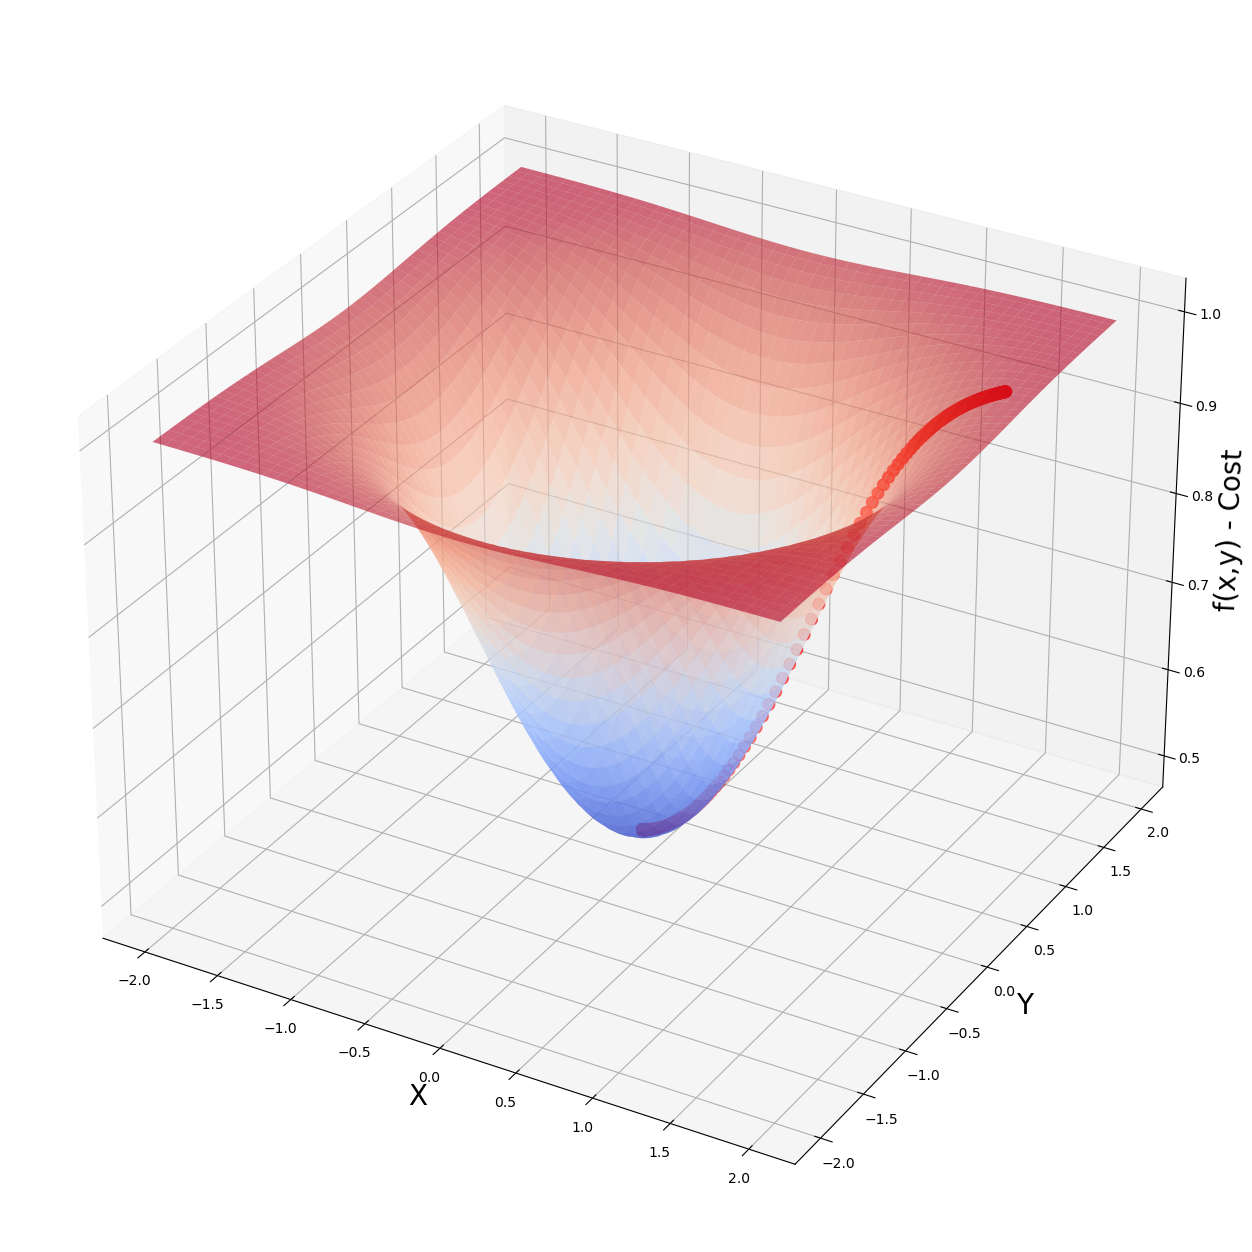

In [79]:
# haben jetzt eine array mit den 2d werten udn fügen das graphish nun hinzu
# als scatter plot

# für 3d Plot
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #colormap
#die figure funktion hat einen return wert -> eine Figure, den wir speichern wollen
fig = plt.figure(figsize = [16,16])
# figure ist wie ein container für anderes

ax = fig.add_subplot(projection='3d') # schafft den 3d Raum
# gca = get current axis

ax.set_xlabel("X", fontsize = 20)
ax.set_ylabel("Y", fontsize = 20)
ax.set_zlabel("f(x,y) - Cost", fontsize = 20)

ax.plot_surface(x_4,y_4, f(x_4,y_4), cmap=cm.coolwarm, alpha = 0.6)

x_vals = values_array[:,0]
y_vals = values_array[:,1]
ax.scatter(x_vals,y_vals, f(x_vals,y_vals), color= "red", s =70)

# je blauer desto geringer die Kosten


# Example 5 - Data with a real Cost Function
## Mean Squared Error / Mittlere quadratische Abweichung
## cost function for regression problems

### $$ RSS = \sum\nolimits_{i=1}^n \big( y^{(i)} - h\theta(x^{(i)})  \big)^2 $$

### $$ MSE = \sum\nolimits_{i=1}^n \frac {\big( y^{(i)} - h\theta(x^{(i)})  \big)^2}{n} $$

### $$ MSE = \sum\nolimits_{i=1}^n \frac {\big( y -\hat{y}\big)^2}{n} $$


## Mittlere quadratische Abweichung hat wenig Probleme mit Overflow, da wir immer durch n teilen. So bleiben die Zahlen "klein" und wir können große Datenmengen bearbeiten -> Darum als Cost function sehr beliebt

In [80]:
# making data



x_5 = np.array([0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]).reshape(7, 1)
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(-1, 1) # die minus 1 ist die länge und daher universell richtig

print(x_5)


[[0.1]
 [1.2]
 [2.4]
 [3.2]
 [4.1]
 [5.7]
 [6.5]]


In [81]:
# quick linear regression

regr = LinearRegression() # braucht 2d array import
regr.fit(x_5, y_5)
print("Theta 0:", regr.intercept_[0])
print("Theta 1", regr.coef_[0][0])

Theta 0: 0.8475351486029536
Theta 1 1.2227264637835915


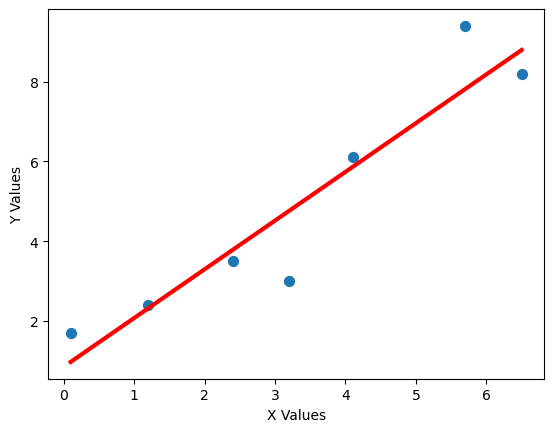

In [82]:

plt.xlabel("X Values")
plt.ylabel("Y Values")

plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color = "red", linewidth =3)
# this is the best fit line not the cost function  it's plotting the data



plt.show()

# cost function zeigt, wie weit wir weg sind davon

### $$ MSE = \sum\nolimits_{i=1}^n \frac {\big( y -\hat{y}\big)^2}{n} $$

In [83]:
# y_hat = theta0 + theta1*x
y_hat =  regr.intercept_[0] + regr.coef_[0][0]* x_5
print("Vorhergesagte Werte für y_dach \n", y_hat)
print("Our actual values are \n", y_5)
print("unser ziel ist es den unterschied zu minimieren \n und die funtkion zu finden, das das modellier")




def mse(y, y_hat):
    y_diff = (y - y_hat)**2
    sum =0 
    for num in y_diff:
        sum = sum + num
    
    mse = sum / len(y_diff)
    return mse
    
#mse(y_5, y_hat)

def msee(y, y_hat):
   # y_diff = (y - y_hat)**2
    cal = np.sum((y - y_hat)**2) / y.size
    return cal

     
#    mse_calc = sum(y_diff) /len(y_diff)
#    return mse_calc

msee(y_5, y_hat)



Vorhergesagte Werte für y_dach 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Our actual values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]
unser ziel ist es den unterschied zu minimieren 
 und die funtkion zu finden, das das modellier


0.9479655759794577

In [84]:
print("Manually calculated MSE is: ", msee(y_5, y_hat))
print("MES regression using manual cal is: ", mean_squared_error(y_5, y_hat))
print("MES regression using manual cal is: ", mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is:  0.9479655759794577
MES regression using manual cal is:  0.9479655759794577
MES regression using manual cal is:  0.9479655759794577


## 3d Plot for the MSE Cost Function
### Make data for theta (cost function depends on the thetas


In [85]:
nr_thetas = 500
th_0 = np.linspace(start=-1, stop= 3, num=nr_thetas)   # isst der Intercept = y Achsenabschnitt
th_1 = np.linspace(start=-1, stop= 3, num=nr_thetas)   # ist der Regressions koeffizient = steigung der "Linie"
# haben 1 array und brauchen ein 2d array nun



plot_t0, plot_t1 = np.meshgrid(th_0, th_1) 


# macht unsere 1d arrays 2dimensional

### nested loop to calculate MSE


In [86]:
zero_array = np.zeros((2,3)) # 2 mal 3 array aus nullen
plot_cost = np.zeros((nr_thetas, nr_thetas))
# plot_cost wollenw wir jetzt mit allen combinationen aus th0 und th1 befüllen

# aus den thetas berechnen wir uns y_hat und geben es dann in der
#msee funktion weiter
for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j]+ plot_t1[i][j]*x_5
        plot_cost[i][j] =  msee(y_5,y_hat)
        

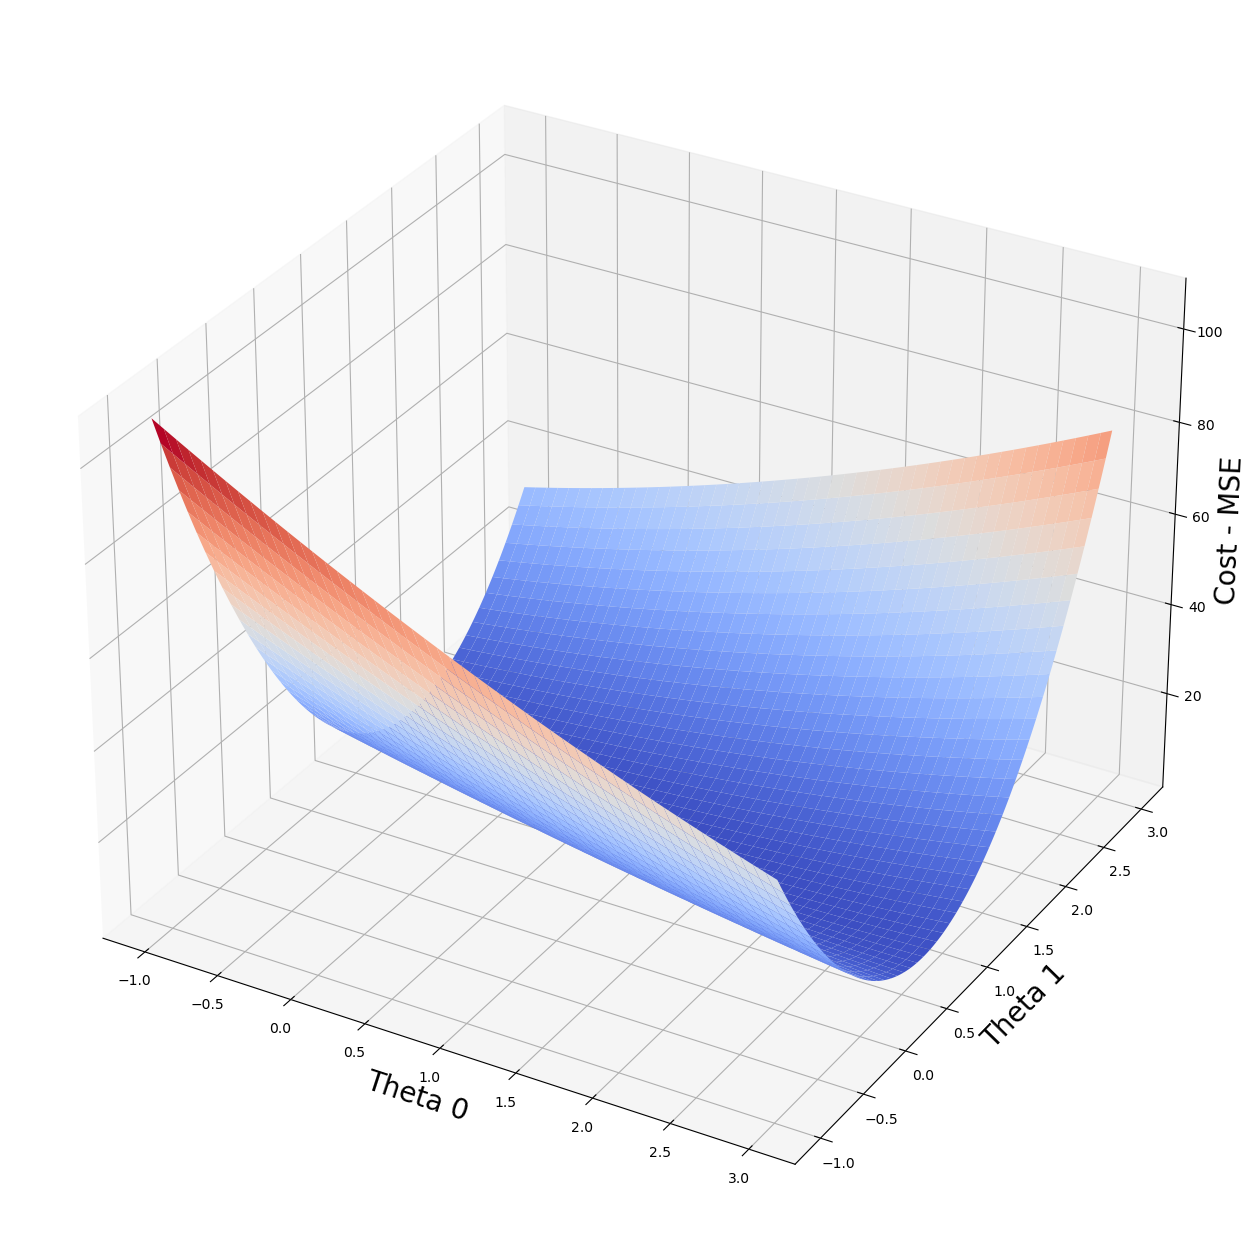

In [87]:
fig = plt.figure(figsize = [16,16])

ax = fig.add_subplot(projection='3d') # schafft den 3d Raum

ax.set_xlabel("Theta 0", fontsize = 20)
ax.set_ylabel("Theta 1", fontsize = 20)
ax.set_zlabel("Cost - MSE", fontsize = 20)

ax.plot_surface(plot_t0, plot_t1,plot_cost, cmap=cm.coolwarm)
plt.show()


In [88]:
print("Min value of plot_cost", plot_cost.min())
ij_min = np.unravel_index(indices = plot_cost.argmin(), shape = plot_cost.shape)
#gibt uns die indices wo das minimum liegt

print("Min occurs at (i, j): ", ij_min)
print("Min MSE for Theta 0 at plot_t0 is ", plot_t0[ij_min[0]][ij_min[1]])
print("Min MSE for Theta 0 at plot_t0 is ", plot_t1[ij_min[0]][ij_min[1]])



Min value of plot_cost 0.9480011439999955
Min occurs at (i, j):  (277, 231)
Min MSE for Theta 0 at plot_t0 is  0.8517034068136271
Min MSE for Theta 0 at plot_t0 is  1.220440881763527


In [89]:
# print the gradient descent on our cost function

## Setzen jetzt Lineare Regression in die MSE Formel ein also:
### $$ MSE = \sum_{i=1}^{n} \frac {\big( y_{(i)} -\hat{y_{(i)}}\big)^2}{n} $$

### $$ Lineare Regression = \hat{y} = \theta_0 -\theta_1x$$

### $$ = \sum_{i=1}^{n} \frac {\big( y_{(i)} -\theta_0 -\theta_1x_{(i)}\big)^2}{n} $$

Das wird dann ausmultipliziert um es besser partiell ableiten zu können

Partielle Ableitung nach theta 0:
### $$ \frac{\partial MSE}{\partial \theta_0} = \frac{1}{n} \sum_{i=1}^{n} \big(-2y_{(i)} +2\theta_0 +2\theta_1x_{(i)}\big)  $$
### $$ \frac{\partial MSE}{\partial \theta_0} = \frac{1}{n} \sum_{i=1}^{n} -2\big (y_{(i)} -\theta_0 -\theta_1x_{(i)}\big)  $$
### $$ \frac{\partial MSE}{\partial \theta_0} =  -\frac{2}{n} \sum_{i=1}^{n} \big (y_{(i)} -\theta_0 -\theta_1x_{(i)}\big)  $$


Partielle Ableitung nach theta 1:
### $$ \frac{\partial MSE}{\partial \theta_1} =  \frac{1}{n} \sum_{i=1}^{n} \big(-2x_{(i)}y_{(i)} +2\theta_0x_{(i)} +2\theta_1x_{(i)}^2\big)  $$
### $$\frac{\partial MSE}{\partial \theta_1} =   -\frac{2}{n} \sum_{i=1}^{n} \big(x_{(i)}y_{(i)} -\theta_0x_{(i)}-\theta_1x_{(i)}^2\big)  $$
### $$\frac{\partial MSE}{\partial \theta_1} =   -\frac{2}{n} \sum_{i=1}^{n} \big(y_{(i)} -\theta_0-\theta_1x_{(i)}\big)\big(x_{(i)}\big) $$


## MSE & Gradient Descent

In [90]:
# input x und y , array mit theta parametern(theta0 bei thetas[0] theta1 bei thetas[1])
def grad(x,y, thetas):
    
    n = y.size
    #theta0 
    theta0_ableitung = (-2/n) * np.sum(y-thetas[0] -thetas[1]*x)
    
    #theta1 
    theta1_ableitung = (-2/n) * np.sum((y-thetas[0] -thetas[1]*x)* x)
    
    # output as array
    #return np.array([theta0_ableitung[0], theta1_ableitung[0]])
    return np.append(arr = theta0_ableitung, values = theta1_ableitung )
    #return np.concatenate((theta0_ableitung,theta1_ableitung), axis = 0)

In [91]:
multiplier = 0.01
thetas = np.array([2.9,2.9])

plot_vals = thetas.reshape(1,2)
mse_vals = msee(y_5, thetas[0] + thetas[1] * x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis = 0)
    mse_vals = np.append(arr=mse_vals, values = msee(y_5, thetas[0] + thetas[1] * x_5))

    
    #results

print("Min occurs at Theta1",thetas[0])  
print("Min occurs at Theta1",thetas[1])
#print("MSE ist: ", msee(y_5, thetas[0] + thetas[1]*x_5))



Min occurs at Theta1 0.8532230461743415
Min occurs at Theta1 1.2214935332607393


Let's plot it

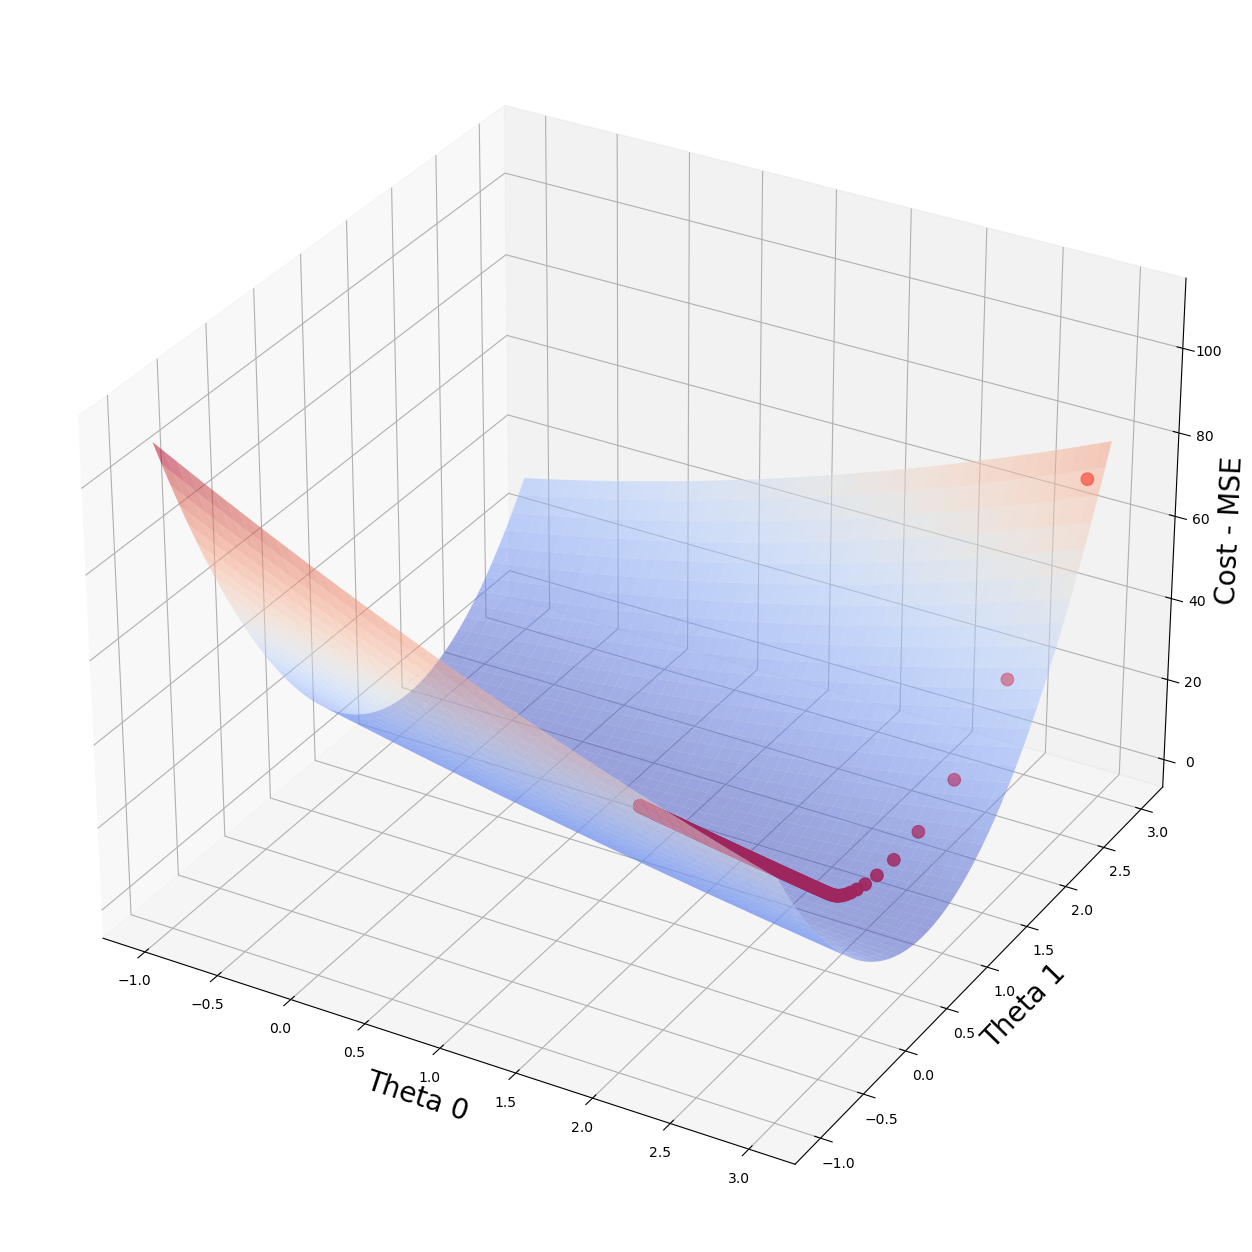

In [92]:
fig = plt.figure(figsize = [16,16])

ax = fig.add_subplot(projection='3d') # schafft den 3d Raum

ax.set_xlabel("Theta 0", fontsize = 20)
ax.set_ylabel("Theta 1", fontsize = 20)
ax.set_zlabel("Cost - MSE", fontsize = 20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s = 80, color ="red")

ax.plot_surface(plot_t0, plot_t1,plot_cost, cmap=cm.coolwarm, alpha =0.5)


plt.show()
